# Name: Swanand Deshpande, Roll no - 16, Subj: ML_LAB, Batch - 01
## EXP 4: Classification Using Logistic Regression, Decision Tree, and k-Nearest Neighbors

In [56]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


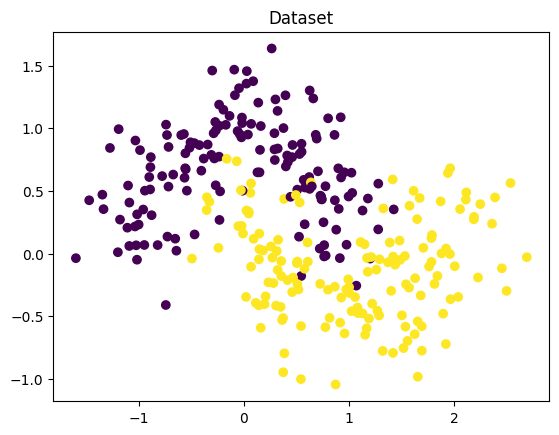

In [57]:
# Create a 2D dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dataset")
plt.show()



In [58]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
# Scaling (needed for LR and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.8777777777777778
Confusion Matrix:
 [[34  5]
 [ 6 45]]


In [61]:
# 2. Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)  # no scaling needed for trees
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


In [62]:
# 3. K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("\nK-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors
Accuracy: 0.9111111111111111
Confusion Matrix:
 [[38  1]
 [ 7 44]]


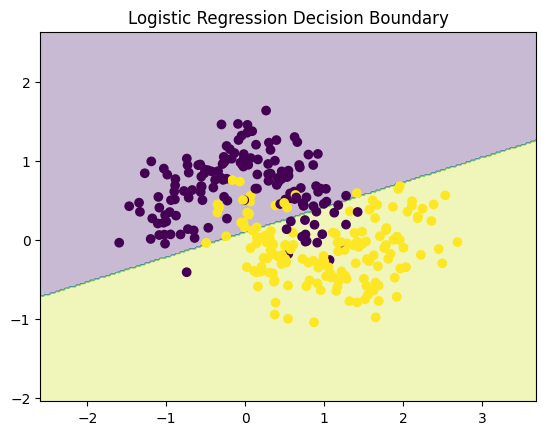

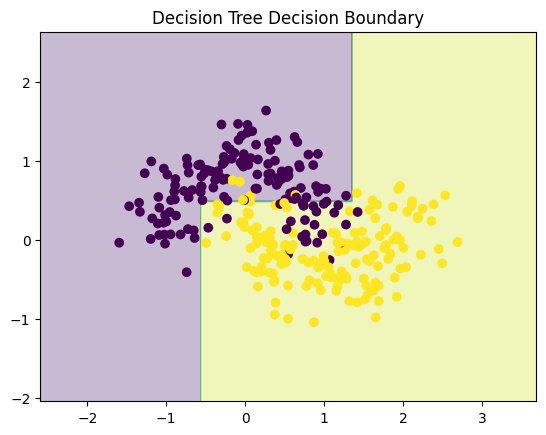

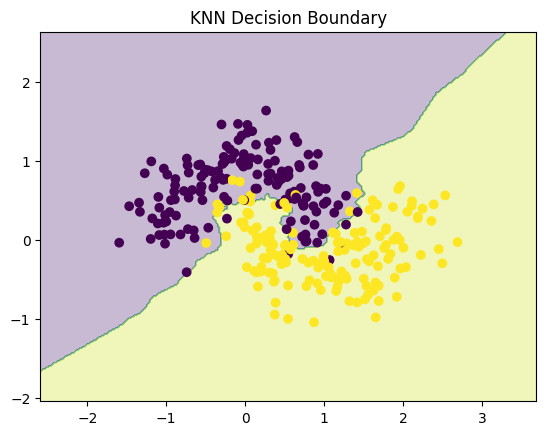

In [ ]:
# plotting decision boundaries function

def plot_decision_boundaries(model, scaled, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    grid = np.c_[xx.ravel(), yy.ravel()]

    if scaled:
        grid = scaler.transform(grid)

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha = 0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundaries(lr, scaled=True, title="Logistic Regression Decision Boundary")
plot_decision_boundaries(dt, scaled=False, title="Decision Tree Decision Boundary")
plot_decision_boundaries(knn, scaled=True, title="KNN Decision Boundary")